# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 451 kB 20.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 26.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 65 kB 4.3 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 69.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 6.8 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp6 # use or create a database named demo
tweet_collection = db.lab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [22]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [33]:
track = ['covid19'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [34]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

AttributeError: module 'tweepy' has no attribute 'StreamListener'

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Fri Dec 10 19:16:58 +0000 2021'
'Fri Dec 10 19:10:19 +0000 2021'
'Fri Dec 10 19:09:25 +0000 2021'
'Fri Dec 10 19:08:55 +0000 2021'
'Fri Dec 10 19:07:03 +0000 2021'
'Fri Dec 10 19:00:22 +0000 2021'
'Fri Dec 10 19:00:01 +0000 2021'
'Fri Dec 10 18:57:48 +0000 2021'
'Fri Dec 10 18:55:41 +0000 2021'
'Fri Dec 10 18:50:52 +0000 2021'
'Fri Dec 10 18:41:49 +0000 2021'
'Fri Dec 10 18:41:21 +0000 2021'
'Fri Dec 10 18:39:52 +0000 2021'
'Fri Dec 10 18:35:42 +0000 2021'
'Fri Dec 10 18:30:00 +0000 2021'
'Fri Dec 10 18:09:20 +0000 2021'
'Fri Dec 10 18:08:22 +0000 2021'
'Fri Dec 10 18:06:10 +0000 2021'
'Fri Dec 10 18:05:32 +0000 2021'
'Fri Dec 10 17:48:47 +0000 2021'
'Fri Dec 10 17:45:27 +0000 2021'
'Fri Dec 10 17:39:31 +0000 2021'
'Fri Dec 10 17:35:07 +0000 2021'
'Fri Dec 10 17:34:11 +0000 2021'
'Fri Dec 10 17:29:28 +0000 2021'
'Fri Dec 10 17:21:48 +0000 2021'
'Fri Dec 10 17:19:52 +0000 2021'
'Fri Dec 10 17:16:06 +0000 2021'
'Fri Dec 10 17:07:03 +0000 2021'
'Fri Dec 10 17:02:53 +0000 2021'
'Fri Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [19]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Dec 10 11:13:32 +0000 2021'
'Fri Dec 10 11:09:24 +0000 2021'
'Fri Dec 10 10:58:09 +0000 2021'
'Fri Dec 10 10:24:58 +0000 2021'
'Fri Dec 10 09:12:29 +0000 2021'
'Fri Dec 10 09:01:17 +0000 2021'
'Fri Dec 10 08:58:28 +0000 2021'
'Fri Dec 10 08:33:18 +0000 2021'
'Fri Dec 10 08:33:17 +0000 2021'
'Fri Dec 10 08:28:27 +0000 2021'
'Fri Dec 10 08:26:47 +0000 2021'
'Fri Dec 10 08:24:26 +0000 2021'
'Fri Dec 10 08:21:04 +0000 2021'
'Fri Dec 10 07:47:17 +0000 2021'
'Fri Dec 10 07:45:38 +0000 2021'
'Fri Dec 10 07:14:26 +0000 2021'
'Fri Dec 10 06:05:36 +0000 2021'
'Fri Dec 10 05:54:50 +0000 2021'
'Fri Dec 10 05:45:59 +0000 2021'
'Fri Dec 10 05:25:49 +0000 2021'
'Fri Dec 10 05:00:42 +0000 2021'
'Fri Dec 10 04:33:29 +0000 2021'
'Fri Dec 10 04:31:28 +0000 2021'
'Fri Dec 10 04:09:14 +0000 2021'
'Fri Dec 10 04:07:37 +0000 2021'
'Fri Dec 10 04:04:55 +0000 2021'
'Fri Dec 10 04:02:46 +0000 2021'
'Fri Dec 10 03:51:26 +0000 2021'
'Fri Dec 10 03:33:07 +0000 2021'
'Fri Dec 10 03:27:28 +0000 2021'
'Fri Dec 1

'Wed Dec 08 22:36:26 +0000 2021'
'Wed Dec 08 22:30:29 +0000 2021'
'Wed Dec 08 22:30:05 +0000 2021'
'Wed Dec 08 22:20:22 +0000 2021'
'Wed Dec 08 22:04:26 +0000 2021'
'Wed Dec 08 21:55:08 +0000 2021'
'Wed Dec 08 21:50:44 +0000 2021'
'Wed Dec 08 21:49:02 +0000 2021'
'Wed Dec 08 21:48:05 +0000 2021'
'Wed Dec 08 21:45:47 +0000 2021'
'Wed Dec 08 21:42:00 +0000 2021'
'Wed Dec 08 21:36:36 +0000 2021'
'Wed Dec 08 21:30:01 +0000 2021'
'Wed Dec 08 21:29:49 +0000 2021'
'Wed Dec 08 21:27:27 +0000 2021'
'Wed Dec 08 21:18:21 +0000 2021'
'Wed Dec 08 21:14:03 +0000 2021'
'Wed Dec 08 21:10:59 +0000 2021'
'Wed Dec 08 21:00:01 +0000 2021'
'Wed Dec 08 20:45:44 +0000 2021'
'Wed Dec 08 20:26:00 +0000 2021'
'Wed Dec 08 20:22:11 +0000 2021'
'Wed Dec 08 20:20:40 +0000 2021'
'Wed Dec 08 20:20:00 +0000 2021'
'Wed Dec 08 20:17:04 +0000 2021'
'Wed Dec 08 20:15:08 +0000 2021'
'Wed Dec 08 20:14:30 +0000 2021'
'Wed Dec 08 20:09:48 +0000 2021'
'Wed Dec 08 20:03:12 +0000 2021'
'Wed Dec 08 20:02:00 +0000 2021'
'Wed Dec 0

'Tue Dec 07 16:38:42 +0000 2021'
'Tue Dec 07 16:27:59 +0000 2021'
'Tue Dec 07 16:25:44 +0000 2021'
'Tue Dec 07 16:07:07 +0000 2021'
'Tue Dec 07 16:05:08 +0000 2021'
'Tue Dec 07 16:03:45 +0000 2021'
'Tue Dec 07 16:02:30 +0000 2021'
'Tue Dec 07 16:01:26 +0000 2021'
'Tue Dec 07 16:00:57 +0000 2021'
'Tue Dec 07 16:00:41 +0000 2021'
'Tue Dec 07 15:58:32 +0000 2021'
'Tue Dec 07 15:57:15 +0000 2021'
'Tue Dec 07 15:55:43 +0000 2021'
'Tue Dec 07 15:43:09 +0000 2021'
'Tue Dec 07 15:41:04 +0000 2021'
'Tue Dec 07 15:40:50 +0000 2021'
'Tue Dec 07 15:38:54 +0000 2021'
'Tue Dec 07 15:25:41 +0000 2021'
'Tue Dec 07 15:25:24 +0000 2021'
'Tue Dec 07 15:20:11 +0000 2021'
'Tue Dec 07 15:00:31 +0000 2021'
'Tue Dec 07 14:55:00 +0000 2021'
'Tue Dec 07 14:46:05 +0000 2021'
'Tue Dec 07 14:45:06 +0000 2021'
'Tue Dec 07 14:43:39 +0000 2021'
'Tue Dec 07 14:42:31 +0000 2021'
'Tue Dec 07 14:38:05 +0000 2021'
'Tue Dec 07 14:30:56 +0000 2021'
'Tue Dec 07 14:15:32 +0000 2021'
'Tue Dec 07 14:15:05 +0000 2021'
'Tue Dec 0

'Mon Dec 06 00:08:37 +0000 2021'
'Mon Dec 06 00:06:53 +0000 2021'
'Mon Dec 06 00:05:53 +0000 2021'
'Sun Dec 05 23:50:48 +0000 2021'
'Sun Dec 05 23:34:51 +0000 2021'
'Sun Dec 05 23:23:57 +0000 2021'
'Sun Dec 05 23:23:04 +0000 2021'
'Sun Dec 05 23:21:20 +0000 2021'
'Sun Dec 05 23:06:36 +0000 2021'
'Sun Dec 05 22:20:20 +0000 2021'
'Sun Dec 05 21:52:09 +0000 2021'
'Sun Dec 05 21:39:03 +0000 2021'
'Sun Dec 05 21:26:48 +0000 2021'
'Sun Dec 05 21:21:54 +0000 2021'
'Sun Dec 05 21:06:43 +0000 2021'
'Sun Dec 05 21:02:39 +0000 2021'
'Sun Dec 05 20:57:30 +0000 2021'
'Sun Dec 05 20:56:52 +0000 2021'
'Sun Dec 05 20:55:52 +0000 2021'
'Sun Dec 05 20:47:32 +0000 2021'
'Sun Dec 05 20:43:32 +0000 2021'
'Sun Dec 05 20:34:04 +0000 2021'
'Sun Dec 05 20:33:13 +0000 2021'
'Sun Dec 05 20:31:05 +0000 2021'
'Sun Dec 05 20:20:46 +0000 2021'
'Sun Dec 05 20:15:00 +0000 2021'
'Sun Dec 05 20:14:13 +0000 2021'
'Sun Dec 05 19:40:37 +0000 2021'
'Sun Dec 05 19:24:49 +0000 2021'
'Sun Dec 05 19:06:34 +0000 2021'
'Sun Dec 0

'Sat Dec 04 01:39:12 +0000 2021'
'Sat Dec 04 01:09:50 +0000 2021'
'Sat Dec 04 00:57:36 +0000 2021'
'Sat Dec 04 00:52:11 +0000 2021'
'Sat Dec 04 00:43:40 +0000 2021'
'Sat Dec 04 00:25:34 +0000 2021'
'Sat Dec 04 00:25:33 +0000 2021'
'Sat Dec 04 00:24:56 +0000 2021'
'Sat Dec 04 00:24:21 +0000 2021'
'Sat Dec 04 00:18:22 +0000 2021'
'Sat Dec 04 00:15:05 +0000 2021'
'Sat Dec 04 00:03:05 +0000 2021'
'Fri Dec 03 23:59:30 +0000 2021'
'Fri Dec 03 23:50:26 +0000 2021'
'Fri Dec 03 23:48:35 +0000 2021'
'Fri Dec 03 23:47:50 +0000 2021'
'Fri Dec 03 23:41:13 +0000 2021'
'Fri Dec 03 23:40:32 +0000 2021'
'Fri Dec 03 23:20:02 +0000 2021'
'Fri Dec 03 23:16:52 +0000 2021'
'Fri Dec 03 23:14:23 +0000 2021'
'Fri Dec 03 23:03:22 +0000 2021'
'Fri Dec 03 23:00:08 +0000 2021'
'Fri Dec 03 22:56:03 +0000 2021'
'Fri Dec 03 22:55:00 +0000 2021'
'Fri Dec 03 22:46:49 +0000 2021'
'Fri Dec 03 22:35:04 +0000 2021'
'Fri Dec 03 22:34:36 +0000 2021'
'Fri Dec 03 22:30:10 +0000 2021'
'Fri Dec 03 22:28:30 +0000 2021'
'Fri Dec 0

'Fri Dec 03 00:40:06 +0000 2021'
'Fri Dec 03 00:38:48 +0000 2021'
'Fri Dec 03 00:35:46 +0000 2021'
'Fri Dec 03 00:32:35 +0000 2021'
'Fri Dec 03 00:32:21 +0000 2021'
'Fri Dec 03 00:30:11 +0000 2021'
'Fri Dec 03 00:22:49 +0000 2021'
'Fri Dec 03 00:21:15 +0000 2021'
'Fri Dec 03 00:19:01 +0000 2021'
'Fri Dec 03 00:16:21 +0000 2021'
'Fri Dec 03 00:07:39 +0000 2021'
'Thu Dec 02 23:54:25 +0000 2021'
'Thu Dec 02 23:53:21 +0000 2021'
'Thu Dec 02 23:50:55 +0000 2021'
'Thu Dec 02 23:49:44 +0000 2021'
'Thu Dec 02 23:46:09 +0000 2021'
'Thu Dec 02 23:40:45 +0000 2021'
'Thu Dec 02 23:34:03 +0000 2021'
'Thu Dec 02 23:25:54 +0000 2021'
'Thu Dec 02 23:21:35 +0000 2021'
'Thu Dec 02 23:20:06 +0000 2021'
'Thu Dec 02 23:19:42 +0000 2021'
'Thu Dec 02 23:16:18 +0000 2021'
'Thu Dec 02 23:12:24 +0000 2021'
'Thu Dec 02 23:06:50 +0000 2021'
'Thu Dec 02 23:05:55 +0000 2021'
'Thu Dec 02 23:05:51 +0000 2021'
'Thu Dec 02 22:53:15 +0000 2021'
'Thu Dec 02 22:53:03 +0000 2021'
'Thu Dec 02 22:47:00 +0000 2021'
'Thu Dec 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [20]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1833
821


Create a text index and print the Tweets containing specific keywords. 

In [13]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [14]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [15]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Hawgwilde
text: @TerrieL47367816 @Chris_L_HP @SenatorDurbin Voting rights? No one has lost the right to vote. I don't understand wh… https://t.co/7l7rgInN3e
----
name: Chris: Rebel Alliance #FBPE #FBPPR
text: How can people still be stupid enough to vote for anyone in this Government?
Turkeys voting for Christmas 🙄

https://t.co/5hzkMk01Kf
----
name: b-boy bouiebaisse
text: @daveweigel most of the people who voted in the 1980 election are…dead
----
name: Irony Tower 🐗🥁
text: @notkavi I always vote Dem in every election
----
name: Lynda Pope
text: @jbouie @daveweigel Not me!  My first election was 1972 and I haven't missed voting since.
----
name: Kadie Whitlock
text: If you knew then what you know now, would your December 2019 election vote remain the same?
----
name: #CNN —-THE MOST BUSTED NAME IN NEWS!
text: After watching the 2020 Prez election, @staceyabrams Knows how to "get enough votes" this time!
----
name: Jon Jones
text: @james58691 @maxrushden They normally say th

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [17]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,61b27bdf7dfff7837e04c752,Wed Dec 08 20:58:46 +0000 2021,1468686516071370753,1468686516071370753,@TerrieL47367816 @Chris_L_HP @SenatorDurbin Vo...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.468660e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
1,61b27be37dfff7837e04c7df,Fri Dec 03 07:47:32 +0000 2021,1466675456372060164,1466675456372060164,How can people still be stupid enough to vote ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,2,10,False,False,en,False,NaN,NaN,NaN
2,61b27be47dfff7837e04c819,Wed Dec 01 19:36:47 +0000 2021,1466129167871844355,1466129167871844355,@daveweigel most of the people who voted in th...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.466115e+18,...,False,3,423,False,False,en,NaN,NaN,NaN,NaN
3,61b27be27dfff7837e04c793,Mon Dec 06 05:51:47 +0000 2021,1467733487880921088,1467733487880921088,@notkavi I always vote Dem in every election,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.467722e+18,...,False,0,2,False,False,en,NaN,NaN,NaN,NaN
4,61b27be47dfff7837e04c818,Wed Dec 01 20:27:09 +0000 2021,1466141844161679371,1466141844161679371,@jbouie @daveweigel Not me! My first election...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.466129e+18,...,False,0,1,False,False,en,NaN,NaN,NaN,NaN
5,61b27bdf7dfff7837e04c75e,Wed Dec 08 11:35:01 +0000 2021,1468544642140590101,1468544642140590101,"If you knew then what you know now, would your...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
6,61b27be47dfff7837e04c80f,Wed Dec 01 23:15:32 +0000 2021,1466184216262160384,1466184216262160384,"After watching the 2020 Prez election, @stacey...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,0,3,False,False,en,NaN,NaN,NaN,NaN
7,61b27be07dfff7837e04c760,Wed Dec 08 10:48:20 +0000 2021,1468532894280912903,1468532894280912903,@james58691 @maxrushden They normally say this...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.468531e+18,...,False,0,5,False,False,en,NaN,NaN,NaN,NaN
8,61b27be47dfff7837e04c802,Thu Dec 02 05:46:05 +0000 2021,1466282501119397888,1466282501119397888,@JJisAMarxist I voted for Nader in my first el...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.466250e+18,...,False,0,7,False,False,en,NaN,NaN,NaN,NaN
9,61b27be27dfff7837e04c7bf,Sat Dec 04 19:18:24 +0000 2021,1467211702517305347,1467211702517305347,@blueheartedly @CalltoActivism We sit on our a...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.466932e+18,...,False,6,15,False,False,en,NaN,NaN,NaN,NaN


<AxesSubplot:>

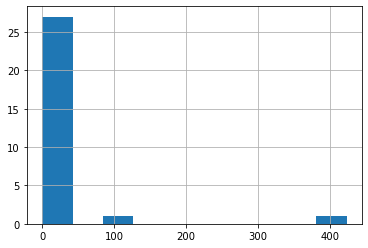

In [18]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count